# Ad Interation using Logistic Regression

**The goal of this project is to analyze user data to determine if a user will interact with the advertisement they have been shown.** <br><br>
This is best done using a logistic regression model, which will predict discrete values - such as whether or not a user will click an ad - from continous or discrete parameters such as internet usage and sex. 

# Import necessary libraries

**Import pandas, numpy, seaborn, matplotlib, and train_test_split.** <br>
Set the style of the seaborn plots to be more legible

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')
%matplotlib inline

Import the advertising data

In [2]:
ad_data = pd.read_csv('advertising.csv')

Let's check out the head of this dataset.

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


From checking out the head, we know that this dataset contains the following measurements: <br>

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': 0 or 1 indicated if a consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

From this the 'Click on Ad' parameter is what we are trying to predict, and the Daily Time Spent on Site, Age, Daily Internet Usage, and Male columns will probably be easiest to form a logistic regression model from. Parameters such as city would require additional processing so let's see how we do without it first. <br>

Now we want to check out the info to check for any missing data and see if we have to do any data cleaning. 

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Perfect! Our data looks to be all there.<br>

We'll now explore the data through some plots.<br>
First lets check out the age distribution of our data.

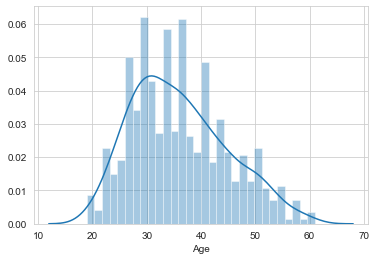

In [30]:
sns.distplot(ad_data['Age'],bins=30,kde=True)

From this we can determine that most of our users are under the age of 35.<br>

Now let's check out the income distribution versus the age of our different users. 

55000.00008000003

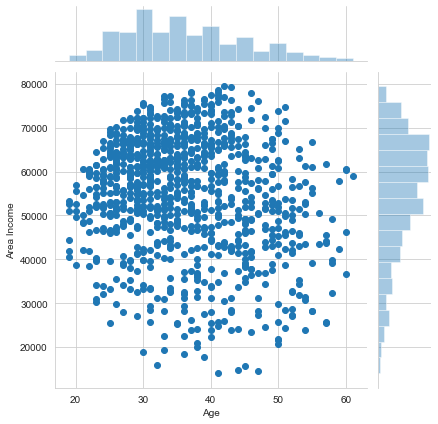

In [32]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)
ad_data['Area Income'].mean()

It looks like most our users are normally distributed around roughly $60,000, which makes sense with the national GDP of the US.<br> Let's check the mean and median for sanity.

In [39]:
print('Area Income mean:', ad_data['Area Income'].mean())
print('Area Income median:', ad_data['Area Income'].median())

Area Income mean: 55000.00008000003
Area Income mean: 57012.3


That looks to be the case, althrough our data is biased downwards from the mean, so may we have some low income outliers or poor representation of higher-income users since we would typically expect the mean income to be above the median income if we are trying to mimic country income data.<br><br>

We have some intuition that age may be correlated with internet usage since younger generations are more adept with the internet, so let's see if that is the case with our data set. 

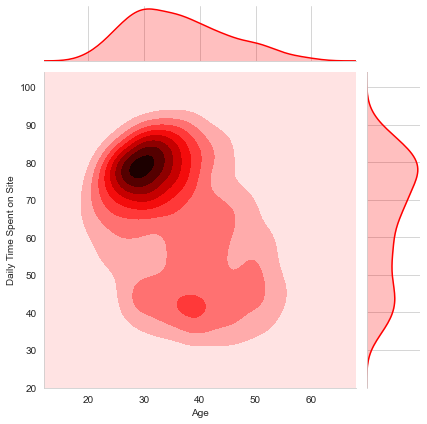

In [40]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='Red')

Beautiful, our data matches our intuition that a younger age would be indicative or a higher internet usage.<br>

Let's do one last plot: a pair plot with the hue being the 'Clicked on Ad' feature to start to gain some intuition of what would be indicative of whether or not someone clicked on an ad. 

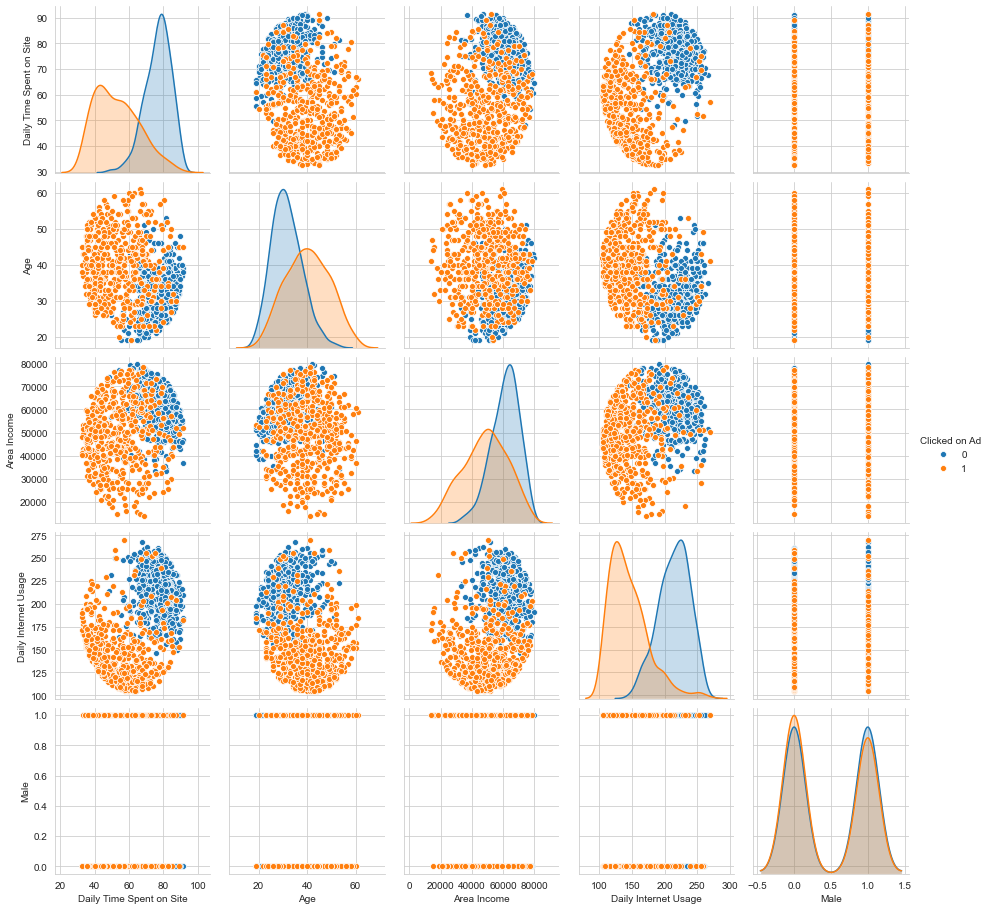

In [6]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

There is lots to discuss here but I want to point out a few insights we can gather from this plot:<br>
* The higher the internet usage, the less likely they are to click an ad
* Younger users are less likely to click on ads
* The more time a user spends on a site, the less likely they are to click on an ad
* A higher income is slightly indicative of clicking ads less

Now let's start to build or model! First we need split our data to build a training set and a test set. 

In [43]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

**Now that our data is split, let's construct a logistic regression model!**

In [49]:
from sklearn.linear_model import LogisticRegression
ad_lr_model = LogisticRegression()

Let's train our logistic model on the training set we split earilier 

In [51]:
ad_lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now let's make some predictions based on that dataset using the test set we put aside earlier

In [26]:
predictions = lr.predict(X_test)

Import the classification_report and confusion_matrix so we can get a sense of the accuracy of our model

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.92      0.91       145
          1       0.92      0.90      0.91       155

avg / total       0.91      0.91      0.91       300

[[133  12]
 [ 15 140]]


**Here we can see that our model had a 91% accuracy at predicting whether or not a user will click an ad, pretty good!<br><br>**
We can see that our model produced 133 accurate guesses that someone would click an add, 15 false positives, 12 false negatives, and 140 true negatives. <br>

Maybe we could improve this model by increasing the size of the dataset or using more of the location features we left untouched at the beginning of this analysis. Some investigation into the bias regarding user income should be done before more data is collected, and narrowing geographic location to recieve a more accurate depiction of ad data in a given region could also be done with this dataset.<br>